# LAB 7 Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
adult_df = pd.read_csv('adult.csv', header=None)
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
                    'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                    'income']
adult_df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [4]:
# Personal Practice 1
adult_df.head(n = 8)

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   

           marital_status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   

       sex  capital_gain  capital_loss  hours_per_week  native_country  income  
0     Male          2174             0              40   United-States   <=50K  
1     Male             0             0              13   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3     Male             0             0              40   United-States   <=50K  
4   Female             0             0              40            Cuba   <=50K  
5   Female             0             0              40   United-States   <=50K  
6   Female             0             0              16         Jamaica   <=50K  
7     Male             0             0              45   United-States    >50K

In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Personal Practice 2
adult_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 15 entries, age to income
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
categoricals = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'native_country', 'income']
numericals = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [8]:
# Personal Practice 3
categoricals_and_numericals = categoricals + numericals
print(categoricals_and_numericals)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [9]:
adult_df[categoricals].head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [10]:
# Personal Practice 4
adult_df[categoricals_and_numericals].head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  age  fnlwgt  \
0   Not-in-family   White     Male   United-States   <=50K   39   77516   
1         Husband   White     Male   United-States   <=50K   50   83311   
2   Not-in-family   White     Male   United-States   <=50K   38  215646   
3         Husband   Black     Male   United-States   <=50K   53  234721   
4            Wife   Black   Female            Cuba   <=50K   28  338409   

   education_num  capital_gain  capital_loss  hours_per_week  
0             13          2174             0              40  
1             13             0             0              13  
2              9             0             0              40  
3              7             0             0              40  
4             13             0             0              40

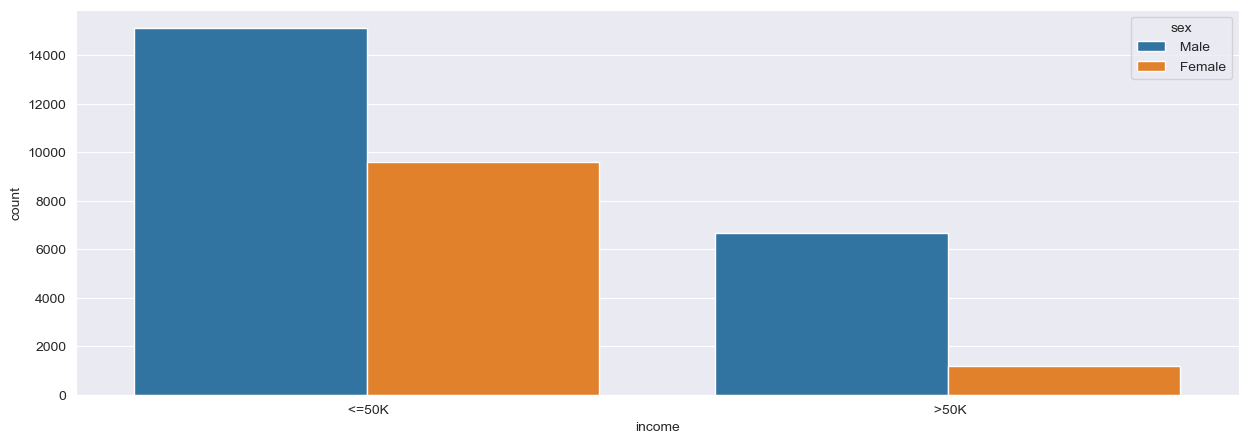

In [11]:
sns.countplot(x = adult_df['income'], hue = 'sex', data = adult_df)
plt.show()

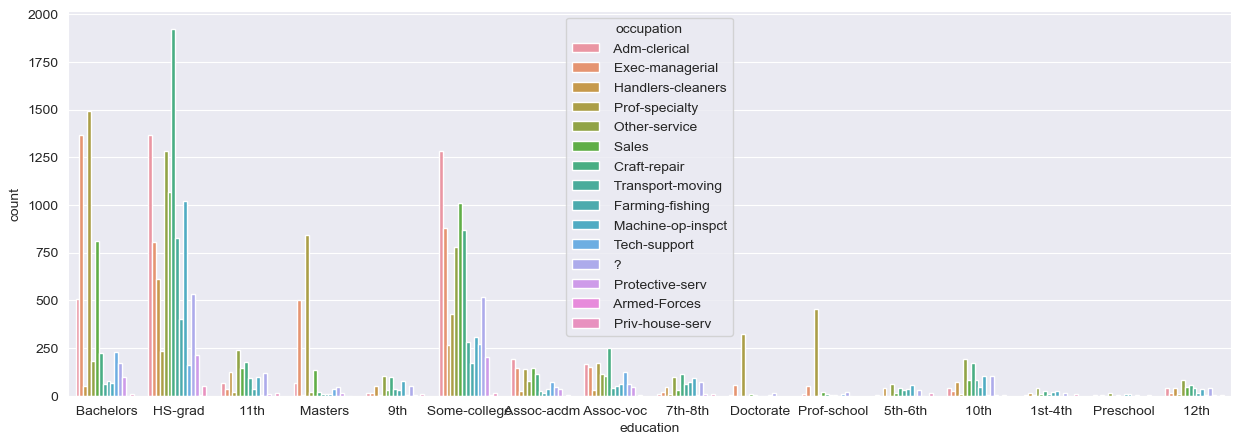

In [12]:
# Personal Practice 5
sns.countplot(x = adult_df['education'], hue = 'occupation', data = adult_df)
plt.show()

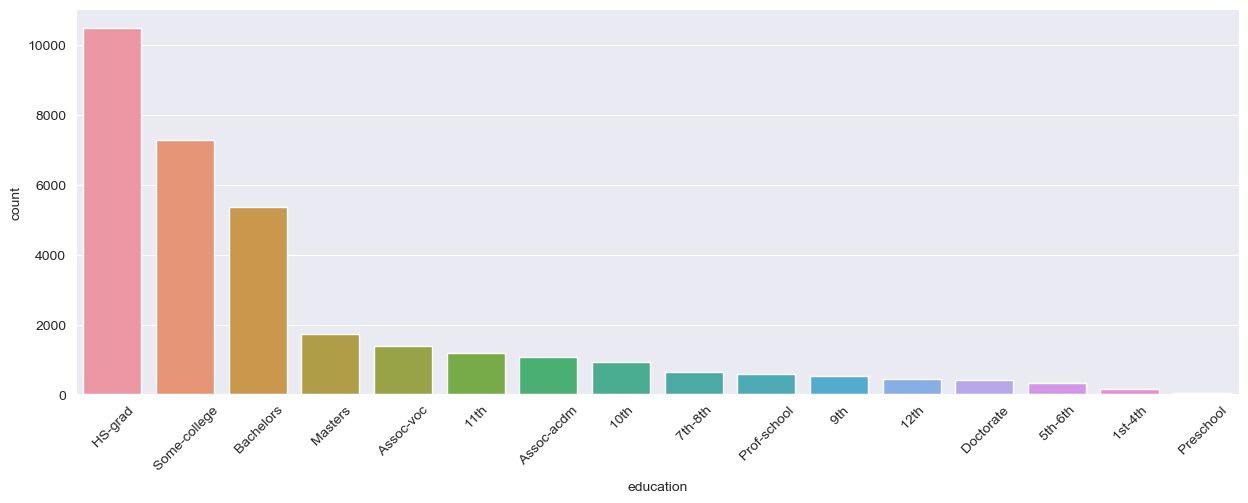

In [13]:
sns.countplot(x = adult_df['education'], order = adult_df['education'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

In [14]:
# Personal Practice 6
print(adult_df['race'].value_counts(), "\n")
print(adult_df['race'].value_counts().index, "\n")
print(adult_df['race'].value_counts().values)

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64 

Index([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'],
      dtype='object') 

[27816  3124  1039   311   271]


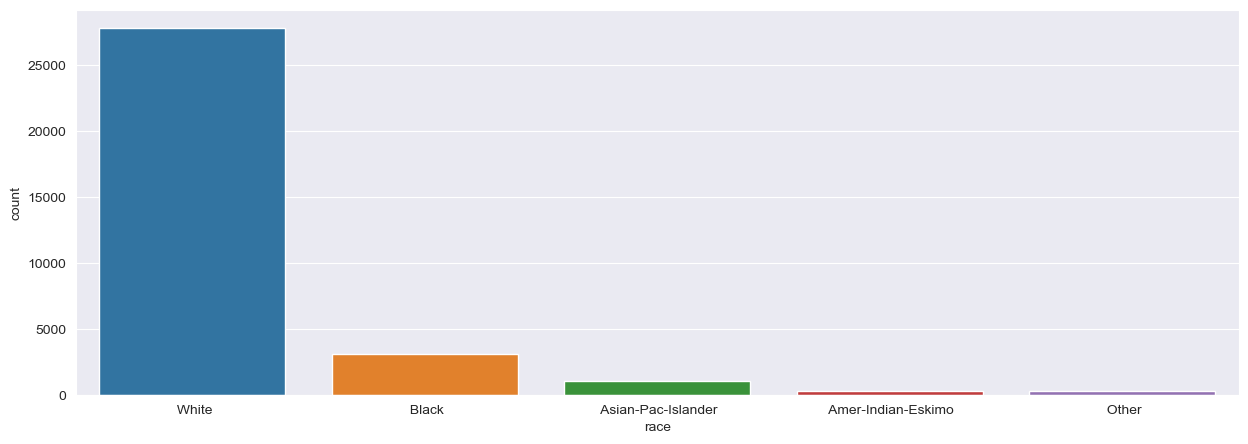

In [15]:
sns.countplot(x = adult_df['race'], data = adult_df)
plt.show()

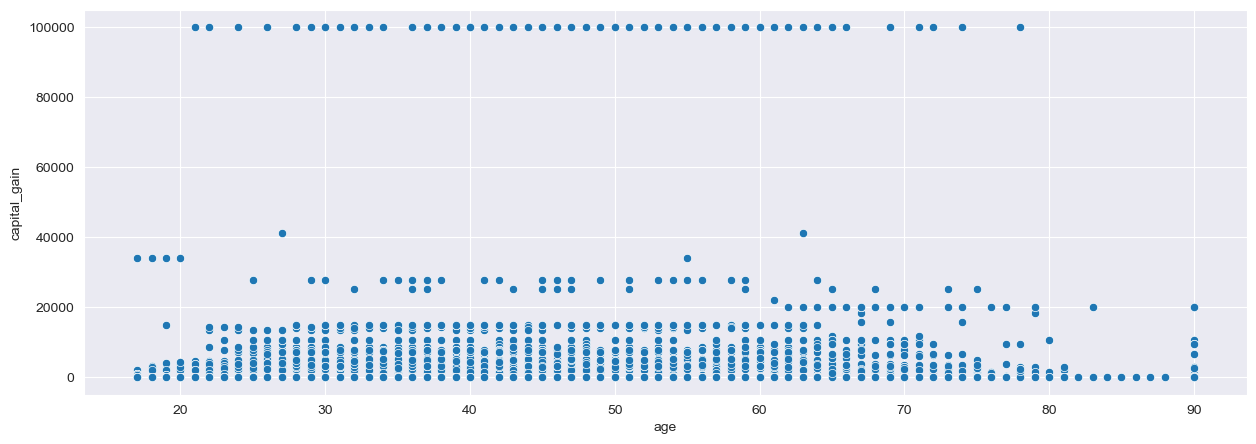

In [16]:
# Personal Practice 7
sns.scatterplot(x = 'age', y = 'capital_gain', data = adult_df)
plt.show()

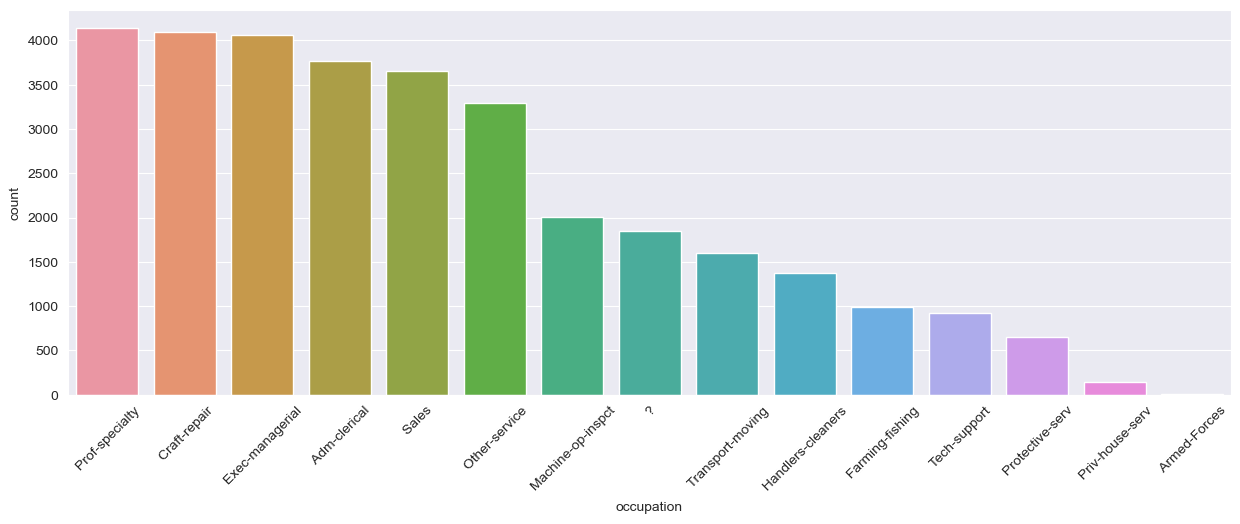

In [17]:
sns.countplot(x = adult_df['occupation'], data = adult_df, order = adult_df['occupation'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

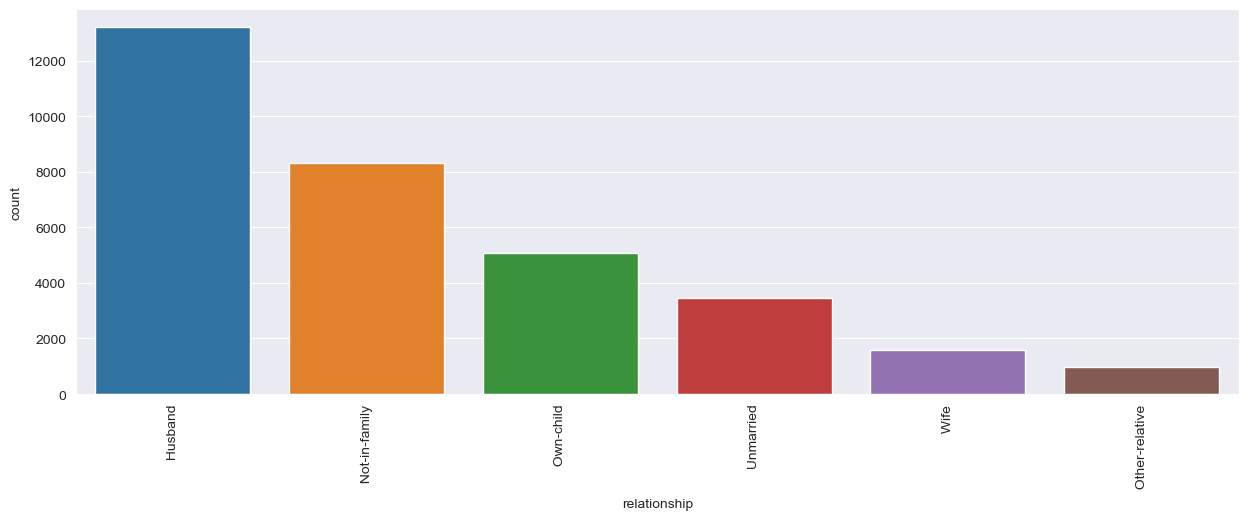

In [18]:
# Personal Practice 8
sns.countplot(x = adult_df['relationship'], order = adult_df['relationship'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [19]:
adult_df['workclass'] = adult_df['workclass'].replace(' ?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', np.NaN)
adult_df['native_country'] = adult_df['native_country'].replace(' ?', np.NaN)

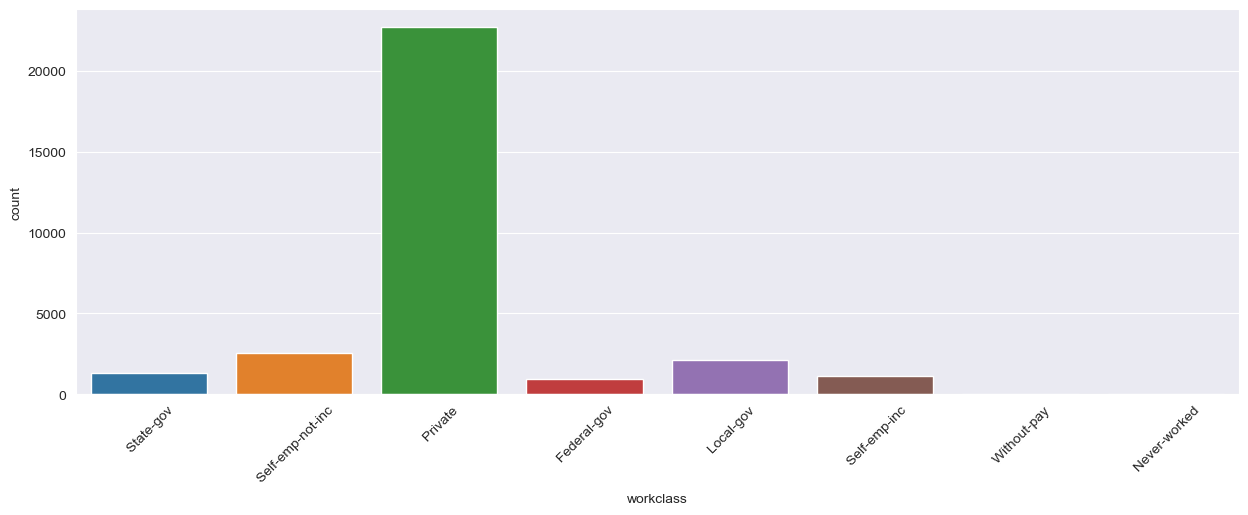

In [20]:
# Personal Practice 9
sns.countplot(x = adult_df['workclass'])
plt.xticks(rotation = 45)
plt.show()

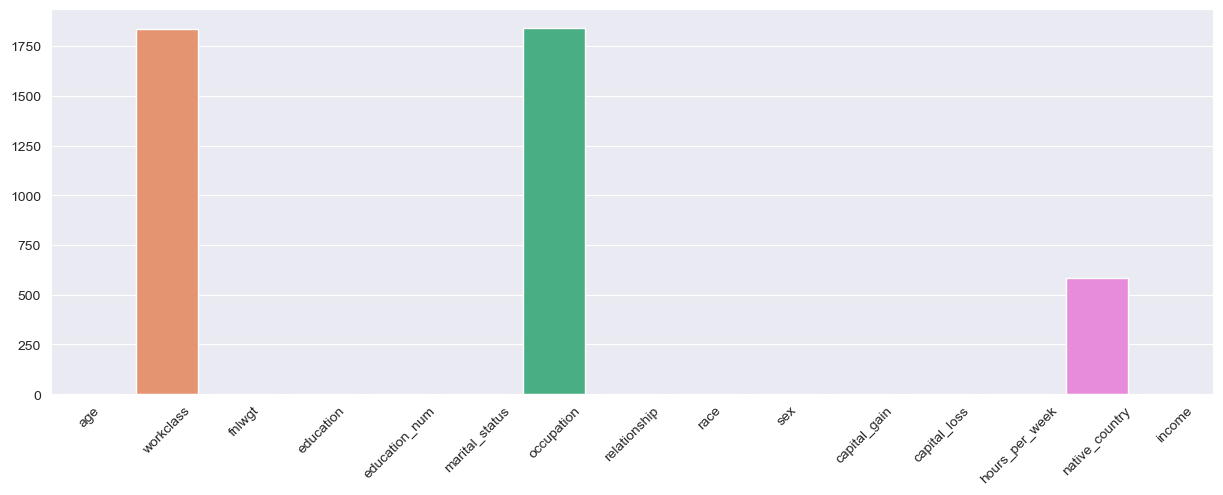

In [21]:
sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

In [22]:
# Personal Practice 10
adult_df['hours_per_week'].head()

0    40
1    13
2    40
3    40
4    40
Name: hours_per_week, dtype: int64

In [23]:
adult_df[numericals].head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

In [24]:
# Personal Practice 11
adult_df[numericals].describe(percentiles = [.2, .6, .8])

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
20%       26.000000  1.066480e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
60%       41.000000  1.963380e+05      10.000000      0.000000      0.000000   
80%       50.000000  2.598730e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
20%         35.000000  
50%         40.000000  
60%         40.000000  
80%         48.000000  
max         99.000000

In [25]:
for variable in numericals:
    if not adult_df[adult_df[variable] == ' ?'].empty:
        print(f'{variable} contains missing values ( ?)')

In [26]:
# Personal Practice 12
for variable in categoricals:
    if variable == '?':
        print(f'{variable} contains missing values ( ?)')

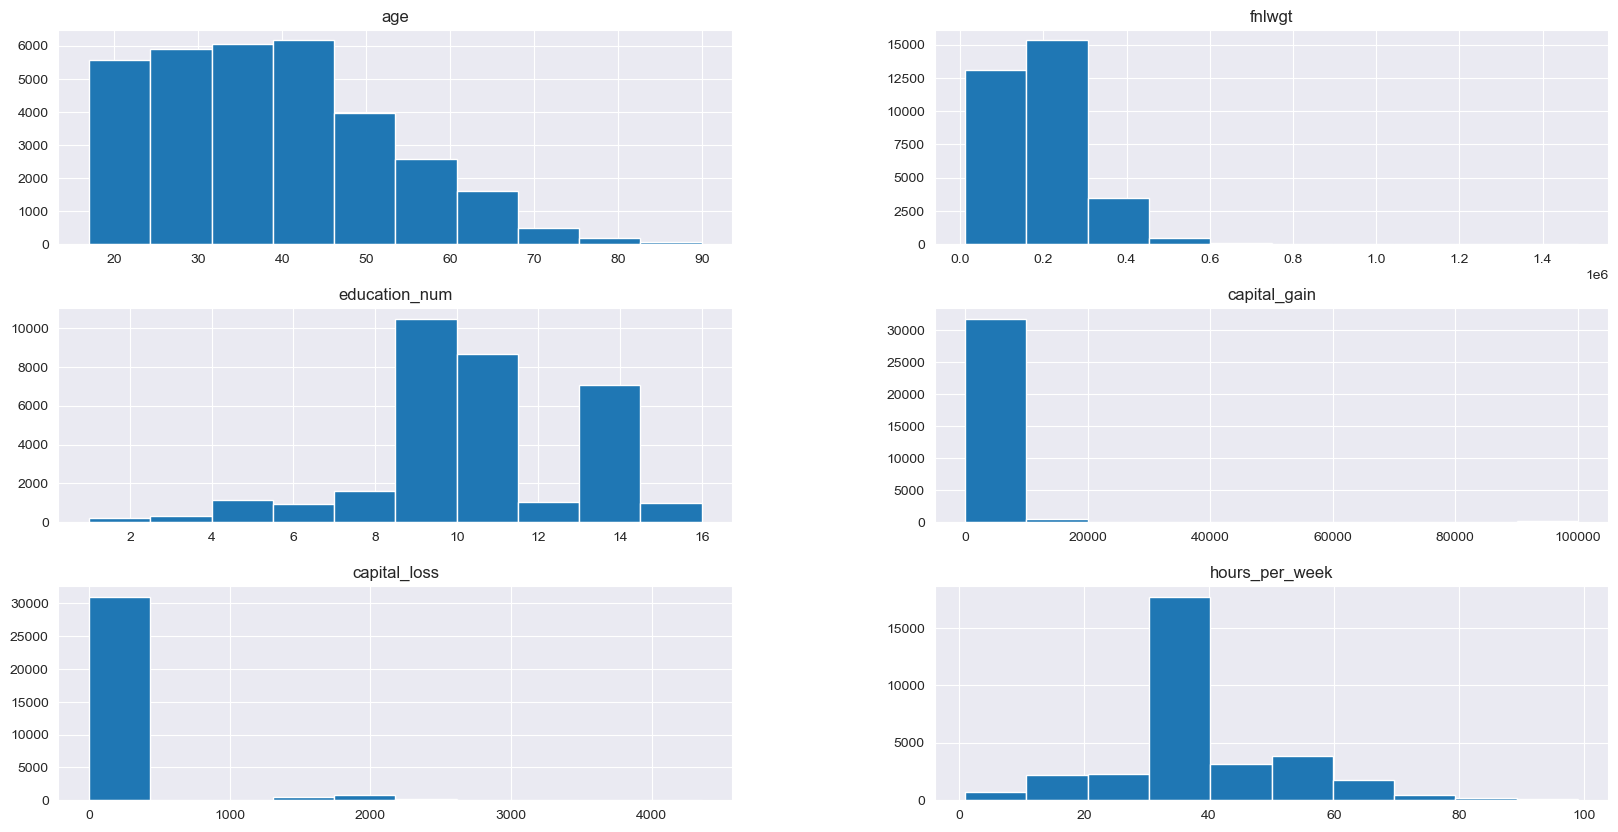

In [27]:
adult_df[numericals].hist(figsize=(20, 10))
plt.show()

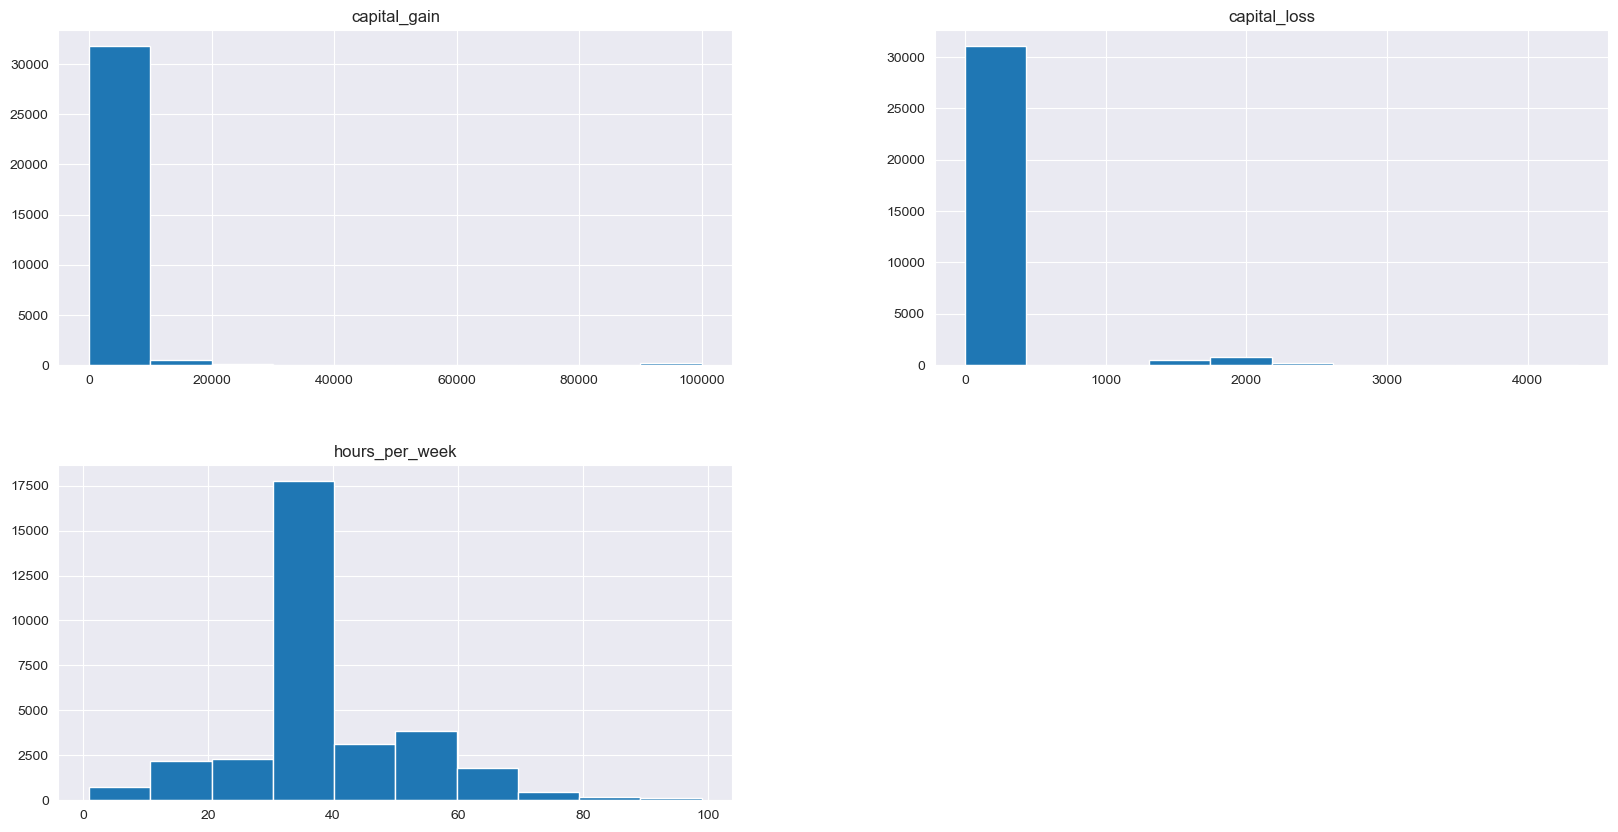

In [28]:
# Personal Practice 13
adult_df[numericals[3:]].hist(figsize = (20, 10))
plt.show()

In [29]:
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native_country'].fillna(adult_df['native_country'].mode()[0], inplace=True)

In [30]:
# Personal Practice 14
adult_df['capital_loss'].replace(0, 287, inplace = True)
adult_df.head()
adult_df['capital_loss'].replace(287, 0, inplace = True)

In [31]:
adult_df = pd.get_dummies(data=adult_df, columns=categoricals, drop_first=True)

In [32]:
# Personal Practice 15
adult_df1 = pd.get_dummies(data = adult_df, columns = numericals, drop_first = False)
adult_df1.head(n = 10)

workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0                        0                   1   
5                     0                        0                   1   
6                     0                        0                   1   
7                     0                        0                   0   
8                     0                        0                   1   
9                     0                        0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                        0                            0                     1   
1                        0                            1                     0   
2                        0                            0                     0   
3                        0                            0                     0   
4                        0                            0                     0   
5                        0                            0                     0   
6                        0                            0                     0   
7                        0                            1                     0   
8                        0                            0                     0   
9                        0                            0                     0   

   workclass_ Without-pay  education_ 11th  education_ 12th  \
0                       0                0                0   
1                       0                0                0   
2                       0                0                0   
3                       0                1                0   
4                       0                0                0   
5                       0                0                0   
6                       0                0                0   
7                       0                0                0   
8                       0                0                0   
9                       0                0                0   

   education_ 1st-4th  ...  hours_per_week_89  hours_per_week_90  \
0                   0  ...                  0                  0   
1                   0  ...                  0                  0   
2                   0  ...                  0                  0   
3                   0  ...                  0                  0   
4                   0  ...                  0                  0   
5                   0  ...                  0                  0   
6                   0  ...                  0                  0   
7                   0  ...                  0                  0   
8                   0  ...                  0                  0   
9                   0  ...                  0                  0   

   hours_per_week_91  hours_per_week_92  hours_per_week_94  hours_per_week_95  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   
5                  0                  0                  0                  0   
6                  0                  0                  0                  0   
7                  0                  0                  0                  0   
8                  0                  0                  0                  0   
9                  0                  0                  0       

In [33]:
adult_df.head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0                        0                   1   

   workclass_ Self-emp-inc  ...  native_country_ Puerto-Rico  \
0                        0  ...                            0   
1                        0  ...                            0   
2                        0  ...                            0   
3                        0  ...                            0   
4                        0  ...                            0   

   native_country_ Scotland  native_country_ South  native_country_ Taiwan  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

   native_country_ Thailand  native_country_ Trinadad&Tobago  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   native_country_ United-States  native_country_ Vietnam  \
0                              1                        0   
1                              1                        0   
2                              1                        0   
3                              1                        0   
4                              0                        0   

   native_country_ Yugoslavia  income_ >50K  
0                           0             0  
1                           0             0  
2                           0             0  
3                           0             0  
4                           0             0  

[5 rows x 98 columns]

In [34]:
# Personal Practice 16
adult_df.head(n = 14)

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0    39   77516             13          2174             0              40   
1    50   83311             13             0             0              13   
2    38  215646              9             0             0              40   
3    53  234721              7             0             0              40   
4    28  338409             13             0             0              40   
5    37  284582             14             0             0              40   
6    49  160187              5             0             0              16   
7    52  209642              9             0             0              45   
8    31   45781             14         14084             0              50   
9    42  159449             13          5178             0              40   
10   37  280464             10             0             0              80   
11   30  141297             13             0             0              40   
12   23  122272             13             0             0              30   
13   32  205019             12             0             0              50   

    workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                      0                        0                   0   
1                      0                        0                   0   
2                      0                        0                   1   
3                      0                        0                   1   
4                      0                        0                   1   
5                      0                        0                   1   
6                      0                        0                   1   
7                      0                        0                   0   
8                      0                        0                   1   
9                      0                        0                   1   
10                     0                        0                   1   
11                     0                        0                   0   
12                     0                        0                   1   
13                     0                        0                   1   

    workclass_ Self-emp-inc  ...  native_country_ Puerto-Rico  \
0                         0  ...                            0   
1                         0  ...                            0   
2                         0  ...                            0   
3                         0  ...                            0   
4                         0  ...                            0   
5                         0  ...                            0   
6                         0  ...                            0   
7                         0  ...                            0   
8                         0  ...                            0   
9                         0  ...                            0   
10                        0  ...                            0   
11                        0  ...                            0   
12                        0  ...                            0   
13                        0  ...                            0   

    native_country_ Scotland  native_country_ South  native_country_ Taiwan  \
0                          0                      0                       0   
1                          0                      0                       0   
2                          0                      0                       0   
3                          0                      0                       0   
4                          0                      0                       0   
5                          0                      0                       0   
6                          0                      0                       0   
7                          0                      0                       0   
8                          0                      

In [35]:
from sklearn.preprocessing import RobustScaler

X = adult_df.drop('income_ >50K', axis=1)
y = adult_df['income_ >50K']
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X[numericals])
X[numericals] = X_scaled

In [36]:
# Personal Practice 17
from sklearn.preprocessing import RobustScaler

adult_df_copy = adult_df.copy()
X1 = adult_df_copy.drop('income_ >50K', axis=1)
y1 = adult_df_copy['income_ >50K']
scaler1 = RobustScaler()
X1_scaled = scaler1.fit_transform(X1[numericals])
X1[numericals] = X1_scaled

In [37]:
X.head()

age    fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0  0.10 -0.845803       1.000000        2174.0           0.0             0.0   
1  0.65 -0.797197       1.000000           0.0           0.0            -5.4   
2  0.05  0.312773      -0.333333           0.0           0.0             0.0   
3  0.80  0.472766      -1.000000           0.0           0.0             0.0   
4 -0.45  1.342456       1.000000           0.0           0.0             0.0   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0                        0                   1   

   workclass_ Self-emp-inc  ...  native_country_ Portugal  \
0                        0  ...                         0   
1                        0  ...                         0   
2                        0  ...                         0   
3                        0  ...                         0   
4                        0  ...                         0   

   native_country_ Puerto-Rico  native_country_ Scotland  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   native_country_ South  native_country_ Taiwan  native_country_ Thailand  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   native_country_ Trinadad&Tobago  native_country_ United-States  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              1   
4                                0                              0   

   native_country_ Vietnam  native_country_ Yugoslavia  
0                        0                           0  
1                        0                           0  
2                        0                           0  
3                        0                           0  
4                        0                           0  

[5 rows x 97 columns]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
# Personal Practice 18
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.77)

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
# Personal Practice 19
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()
gnb1.fit(X1_train, y1_train)

GaussianNB()

In [42]:
y_pred = gnb.predict(X_test)

In [43]:
# Personal Practice 20
y_pred1 = gnb1.predict(X1_test)

In [44]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8244


In [45]:
# Personal Practice 21
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y1_test, y_pred1)))

Model accuracy score: 0.8243


In [46]:
y_pred_train = gnb.predict(X_train)

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8274
Test set score: 0.8244


In [47]:
# Personal Practice 22
y_pred_train1 = gnb1.predict(X1_train)

print('Training set score: {:.4f}'.format(gnb1.score(X1_train, y1_train)))
print('Test set score: {:.4f}'.format(gnb1.score(X1_test, y1_test)))

Training set score: 0.8196
Test set score: 0.8243


In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6365 1018]
 [ 697 1689]]

True Positives(TP) =  6365

True Negatives(TN) =  1689

False Positives(FP) =  1018

False Negatives(FN) =  697


In [49]:
# Personal Practice 23
cm = confusion_matrix(y1_test, y_pred1)
print('Confusion matrix 1\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix 1

 [[16295  2743]
 [ 1661  4373]]

True Positives(TP) =  16295

True Negatives(TN) =  4373

False Positives(FP) =  2743

False Negatives(FN) =  1661


In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7383
           1       0.62      0.71      0.66      2386

    accuracy                           0.82      9769
   macro avg       0.76      0.78      0.77      9769
weighted avg       0.83      0.82      0.83      9769



In [51]:
# Personal Practice 24
from sklearn.metrics import classification_report

print(classification_report(y1_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     19038
           1       0.61      0.72      0.67      6034

    accuracy                           0.82     25072
   macro avg       0.76      0.79      0.77     25072
weighted avg       0.84      0.82      0.83     25072



In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.82236842 0.81578947 0.81658622 0.83413778 0.83238262 0.8372093
 0.81395349 0.83633172 0.82272927 0.8372093 ]

Average cross-validation score: 0.8269
